<a href="https://colab.research.google.com/github/noviwdd/UTS-Machine-Learning-2023-2024/blob/main/UTS_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing libraries
!pip install --upgrade kneed

import numpy as np
import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, silhouette_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from kneed import KneeLocator
from sklearn.cluster import KMeans

In [3]:
# Menampilkan dataset yang digunakan
url = 'https://raw.githubusercontent.com/isnanmulia/lecture-datasets/main/mobileprice_modified.csv'
dataset = pd.read_csv(url)
print(dataset)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             842.0     0          2.2         0   1       0         7.0   
1            1021.0     1          0.5         1   0       1        53.0   
2             563.0     1          0.5         1   2       1        41.0   
3             615.0     1          2.5         0   0       0        10.0   
4            1821.0     1          1.2         0  13       1        44.0   
...             ...   ...          ...       ...  ..     ...         ...   
1995          794.0     1          0.5         1   0       1         2.0   
1996         1965.0     1          2.6         1   0       0        39.0   
1997         1911.0     0          0.9         1   1       1        36.0   
1998         1512.0     0          0.9         0   4       1        46.0   
1999          510.0     1          2.0         1   5       1        45.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0     

# No. 2

a. Pisahkan bagian atribut prediktor dengan label data menjadi dua variabel terpisah



In [12]:
# Memisahkan atribut prediktor dan atribut label
x = dataset.drop(columns=["price_range"])
y = dataset["price_range"]

In [13]:
# Menampilkan hasil dari pemisahan atribut prediktor dan atribut label
print("Atribut Prediktor (Fitur):")
print(x.head())

print("\nAtribut Label:")
print(y.head())

Atribut Prediktor (Fitur):
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0          842.0     0          2.2         0   1       0         7.0    0.6   
1         1021.0     1          0.5         1   0       1        53.0    0.7   
2          563.0     1          0.5         1   2       1        41.0    0.9   
3          615.0     1          2.5         0   0       0        10.0    0.8   
4         1821.0     1          1.2         0  13       1        44.0    0.6   

   mobile_wt  n_cores  pc  px_height  px_width     ram  sc_h  sc_w  talk_time  \
0      188.0        2   2         20       756     NaN     9     7         19   
1      136.0        3   6        905      1988  2631.0    17     3          7   
2      145.0        5   6       1263      1716  2603.0    11     2          9   
3      131.0        6   9       1216      1786  2769.0    16     8         11   
4      141.0        2  14       1208      1212  1411.0     8     2         15   

   th

b. Gunakan SimpleImputer untuk menangani *missing values*, dengan nilai median dari atribut data sebagai strategi pengisian nilai

In [14]:
# Handling Missing Values
imputer = SimpleImputer(strategy="median")

x_imputed = imputer.fit_transform(x)
x_imputed_df = pd.DataFrame(x_imputed, columns=x.columns)

In [15]:
# Menampilkan atribut prediktor setelah pengisian missing values
print("Atribut Prediktor setelah Pengisian Missing Values:")
print(x_imputed_df.head())

Atribut Prediktor setelah Pengisian Missing Values:
   battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0          842.0   0.0          2.2       0.0   1.0     0.0         7.0   
1         1021.0   1.0          0.5       1.0   0.0     1.0        53.0   
2          563.0   1.0          0.5       1.0   2.0     1.0        41.0   
3          615.0   1.0          2.5       0.0   0.0     0.0        10.0   
4         1821.0   1.0          1.2       0.0  13.0     1.0        44.0   

   m_dep  mobile_wt  n_cores    pc  px_height  px_width     ram  sc_h  sc_w  \
0    0.6      188.0      2.0   2.0       20.0     756.0  2146.5   9.0   7.0   
1    0.7      136.0      3.0   6.0      905.0    1988.0  2631.0  17.0   3.0   
2    0.9      145.0      5.0   6.0     1263.0    1716.0  2603.0  11.0   2.0   
3    0.8      131.0      6.0   9.0     1216.0    1786.0  2769.0  16.0   8.0   
4    0.6      141.0      2.0  14.0     1208.0    1212.0  1411.0   8.0   2.0   

   talk_time  three_g 

Pengujian menggunakan Random Sampling

In [16]:
# Random Sampling
data_sampling = dataset.sample(n = 10, replace=True)
print(data_sampling.head(10))

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
805          1642.0     1          1.6         1   0       0         5.0   
1988         1547.0     1          2.9         0   2       0        57.0   
1654         1727.0     1          2.1         1  10       0        57.0   
1989          586.0     0          2.8         0   2       0        15.0   
1399          672.0     0          0.5         0   7       1        35.0   
1825          842.0     1          1.8         1   4       0        57.0   
1381         1842.0     1          2.2         1   7       0        56.0   
1366         1708.0     0          0.8         0   8       1        14.0   
1949          757.0     1          0.9         1   4       0         NaN   
66           1358.0     1          0.5         0  11       1        36.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
805     0.4      102.0        5  ...       1686      1889  1333.0    18     0   
1

c. Terapkan MinMaxScaler atau **StandardScaler** untuk mengubah nilai atribut prediktor, agar nilai dari masing-masing atribut menjadi seragam

In [17]:
# Scaling Data menggunakan StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_imputed_df)
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

In [18]:
# Menampilkan hasil dari atribut prediktor setelah scaling data
print("Atribut Prediktor setelah Scaling:")
print(x_scaled_df.head())

Atribut Prediktor setelah Scaling:
   battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0      -0.902700 -0.990050     0.830779 -1.019184 -0.762495 -1.043966   
1      -0.494459  1.010051    -1.253064  0.981177 -0.992890  0.957886   
2      -1.539009  1.010051    -1.253064  0.981177 -0.532099  0.957886   
3      -1.420414  1.010051     1.198517 -1.019184 -0.992890 -1.043966   
4       1.330083  1.010051    -0.395011 -1.019184  2.002254  0.957886   

   int_memory     m_dep  mobile_wt   n_cores        pc  px_height  px_width  \
0   -1.381584  0.340740   1.349561 -1.101971 -1.305750  -1.408949 -1.146784   
1    1.161752  0.687548  -0.123125 -0.664768 -0.645989   0.585778  1.704465   
2    0.498273  1.381165   0.131763  0.209639 -0.645989   1.392684  1.074968   
3   -1.215715  1.034357  -0.264729  0.646842 -0.151168   1.286750  1.236971   
4    0.664142  0.340740   0.018479 -1.101971  0.673534   1.268718 -0.091452   

        ram      sc_h      sc_w  talk_time   three_

d. Tampilkan statistik deskriptif dari atribut data sebelum dan setelah dilakukan pengisian missing values dan standarisasi

In [19]:
# Menampilkan Statistik Deskriptif
print("Statistik deskriptif sebelum pengisian missing values:")
print(x.describe())

print("\nStatistik deskriptif setelah pengisian missing values dan standarisasi:")
print(x_scaled_df.describe())

Statistik deskriptif sebelum pengisian missing values:
       battery_power       blue  clock_speed     dual_sim           fc  \
count    1990.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1237.867839     0.4950     1.522250     0.509500     4.309500   
std       439.676025     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       850.250000     0.0000     0.700000     0.000000     1.000000   
50%      1225.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.000000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  1990.000000  2000.000000  1990.000000  2000.000000   
mean      0.521500    31.987940     0.501750   140.344221     4.520500   
std       0.499662    18.136427     0.288416    35.40711

# No 3

a. Gunakan salah satu algoritma berikut untuk membangun model klasifikasi: KNN, **Decision Tree**, SVM (parameter yang digunakan boleh disesuaikan dengan bebas)

**Menggunakan Algoritma Decision Tree**

b. Gunakan metode holdout untuk membagi keseluruhan dataset menjadi data training dan data testing, dengan proporsi 80% data training dan 20% data testing

In [20]:
# Bagi dataset menjadi data training (80%) dan data testing (20%)
x_train, x_test, y_train, y_test = train_test_split(x_scaled_df, y, test_size=0.2, random_state=42) # disini random_state yg digunakan adalah 42

# Melatih model klasifikasi
dtree_model = DecisionTreeClassifier(random_state=42).fit(x_train, y_train)

c. Tampilkan confusion matrix dan akurasi dari model klasifikasi

In [21]:
y_pred = dtree_model.predict(x_test)

# Hitung Akurasi
accuracy = dtree_model.score(x_test, y_test) * 100
print("Akurasi:", accuracy, "%")

# Hitung confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# Tampilkan Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:", report)

Akurasi: 81.75 %
Confusion Matrix:
[[90 15  0  0]
 [ 5 74 12  0]
 [ 0 16 64 12]
 [ 0  0 13 99]]
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.86      0.90       105
           1       0.70      0.81      0.76        91
           2       0.72      0.70      0.71        92
           3       0.89      0.88      0.89       112

    accuracy                           0.82       400
   macro avg       0.82      0.81      0.81       400
weighted avg       0.82      0.82      0.82       400



Menampilkan model Decision Tree berbagai bentuk

In [22]:
# Visualisasi model Decision Tree dalam bentuk teks
text_representation = tree.export_text(dtree_model, feature_names=list(x.columns))
print(text_representation)

|--- ram <= 0.09
|   |--- ram <= -0.99
|   |   |--- px_height <= 1.80
|   |   |   |--- battery_power <= 1.32
|   |   |   |   |--- px_height <= 1.33
|   |   |   |   |   |--- px_width <= 1.68
|   |   |   |   |   |   |--- ram <= -1.19
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- ram >  -1.19
|   |   |   |   |   |   |   |--- ram <= -1.19
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- ram >  -1.19
|   |   |   |   |   |   |   |   |--- px_height <= 1.02
|   |   |   |   |   |   |   |   |   |--- ram <= -1.16
|   |   |   |   |   |   |   |   |   |   |--- px_height <= -0.14
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- px_height >  -0.14
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- ram >  -1.16
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- px_height >  1.02
|   |   |   |   |   |   |   | 

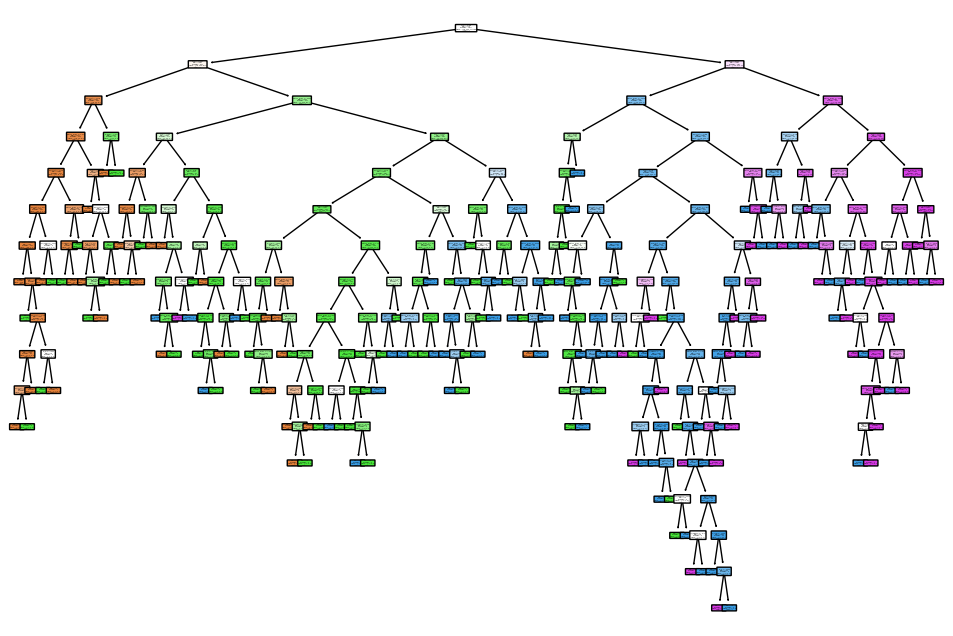

In [23]:
# Visualisasi model Decision Tree dalam bentuk gambar
plt.figure(figsize=(12, 8))
tree.plot_tree(dtree_model,
               feature_names=list(x.columns),
               class_names=["0", "1", "2", "3"],
               filled=True,
               rounded=True)
plt.show()

# No. 4

a. Gunakan salah satu algoritma berikut untuk melakukan clustering: **K-Means**, DBSCAN, Agglomerative clustering (parameter yang digunakan boleh disesuaikan dengan bebas)

**Menggunakan algoritma K-Means**

In [24]:
# Inisialisasi model K-Means
kmeans_model = KMeans(init="random", n_clusters=4, random_state=42, n_init=10)
# Latih model dengan data yang telah diproses
kmeans_model.fit(x_scaled_df)

KMeans(init='random', n_clusters=4, n_init=10, random_state=42)

In [25]:
# Details Model K-Means
print("Sum of Squared Error(SSE):", kmeans_model.inertia_)
print("Koordinat Pusat:", kmeans_model.cluster_centers_)
print("Jumlah Iterasi:", kmeans_model.n_iter_)
print("Label Klaster", kmeans_model.labels_)

Sum of Squared Error(SSE): 34223.190649468714
Koordinat Pusat: [[ 4.67176516e-02  1.00005000e-02  6.71011746e-02 -8.09615175e-02
   1.25040961e+00  2.75839202e-01 -1.92973529e-01  1.46472948e-02
   8.89056241e-02 -4.95877694e-02  1.03370220e+00 -1.28328381e-01
  -1.17032182e-01  8.48087416e-02 -1.39386798e-02 -3.28578788e-02
   4.57771846e-02  5.28492380e-01  1.61241840e-02 -7.25734842e-04]
 [-2.98217760e-02  5.68113513e-02  6.73989094e-02  2.35574440e-02
  -3.65030168e-02 -1.04396559e+00  3.10141104e-02  2.49222604e-02
  -1.00825335e-02  2.63856930e-02 -1.74608638e-02  4.94389085e-02
  -4.05885870e-03 -3.24926442e-02 -2.88195860e-02 -6.13044995e-02
   7.31591366e-02 -1.78686097e+00 -2.72770867e-02 -9.74563597e-03]
 [ 6.07649478e-02 -1.18755938e-02  2.27154276e-02  9.35168813e-02
  -5.46498667e-01  3.04156323e-01  7.16764571e-02 -6.18836697e-02
  -7.10411500e-02 -7.45431873e-02 -4.82852501e-01 -5.14822281e-01
  -4.69496749e-01 -6.08611351e-02 -3.48007677e-01 -3.17098672e-01
  -9.450646

In [26]:
# Menentukan jumlah klaster optimal
kmeans_kwargs = {"init": "random", "n_init": 10}
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x_scaled_df)
    sse.append(kmeans.inertia_)

# KneeLocator untuk menentukan jumlah klaster optimal (elbow point)
kl = KneeLocator(x=range(1, 20), y=sse, curve="convex", direction="decreasing")
optimal_cluster_count = kl.elbow

print("Jumlah klaster optimal (Elbow Point):", optimal_cluster_count)

Jumlah klaster optimal (Elbow Point): 5


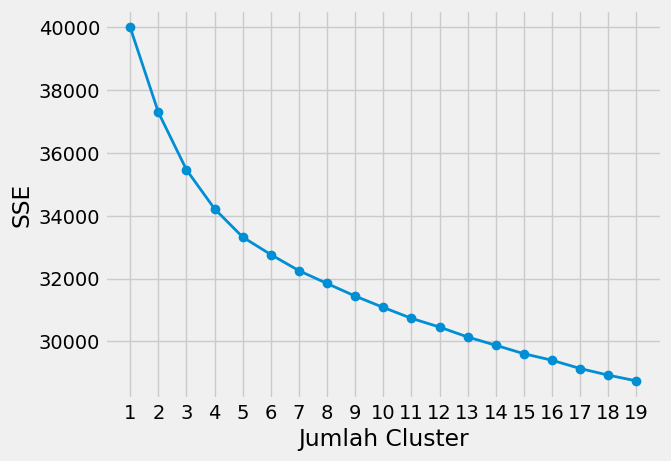

In [30]:
# Grafik Metode Elbow
plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), sse, marker='o', linestyle='-', linewidth=2)
plt.xticks(range(1, 20))
plt.xlabel("Jumlah Cluster")
plt.ylabel("SSE")
plt.show()

b. Tampilkan silhouette score dari model clustering

In [32]:
# Menampilkan Silhouette Coefficients
kmeans_kwargs = {"init": "random", "n_init": 10}
silhouette_coefficients = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x_scaled_df)
    score = silhouette_score(x_scaled_df, kmeans.labels_)
    silhouette_coefficients.append(score)
    print(f"Silhouette Score for {k} clusters: {score}")

print("Silhouette Score:", score)

Silhouette Score for 2 clusters: 0.067724062611456
Silhouette Score for 3 clusters: 0.06562634950460751
Silhouette Score for 4 clusters: 0.058561213121934526
Silhouette Score for 5 clusters: 0.05384416997433909
Silhouette Score for 6 clusters: 0.05337035613858526
Silhouette Score for 7 clusters: 0.048856885639186026
Silhouette Score for 8 clusters: 0.046863632039743704
Silhouette Score for 9 clusters: 0.048347003434171615
Silhouette Score for 10 clusters: 0.04528654735904595
Silhouette Score for 11 clusters: 0.04650056694836357
Silhouette Score for 12 clusters: 0.043689623127356886
Silhouette Score for 13 clusters: 0.04349130679647775
Silhouette Score for 14 clusters: 0.04500331812262429
Silhouette Score for 15 clusters: 0.04485932699713466
Silhouette Score for 16 clusters: 0.043900653933219784
Silhouette Score for 17 clusters: 0.045628217360376554
Silhouette Score for 18 clusters: 0.045742571987633325
Silhouette Score for 19 clusters: 0.045767569274810224
Silhouette Score for 20 clust

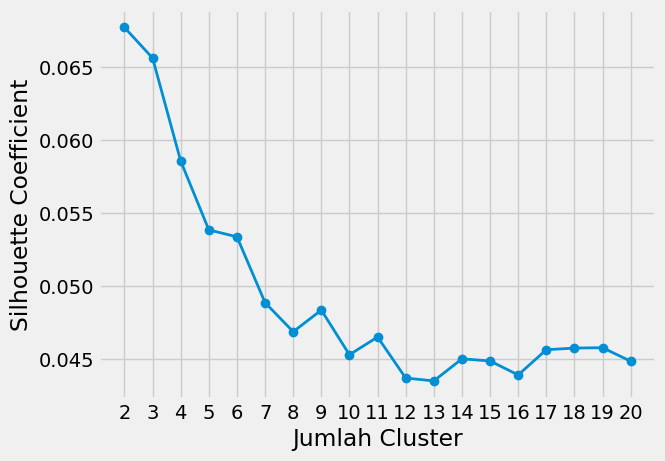

In [33]:
# Grafik Silhouette Coefficients
plt.style.use("fivethirtyeight")
plt.plot(range(2, 21), silhouette_coefficients, marker='o', linestyle='-', linewidth=2)
plt.xticks(range(2, 21))

plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()